# **⭐ Classification Model to Identify Multiple Disease**

In [1]:
# import library
import numpy as np
import pandas as pd

In [2]:
# import data
disease = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/MultipleDiseasePrediction.csv')

In [3]:
# view data
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
# info of data
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
# summary statistics
disease.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# check for missing value
disease.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [7]:
disease.sum()

itching                                                               678
skin_rash                                                             786
nodal_skin_eruptions                                                  108
continuous_sneezing                                                   222
shivering                                                             108
                                              ...                        
inflammatory_nails                                                    114
blister                                                               114
red_sore_around_nose                                                  114
yellow_crust_ooze                                                     114
prognosis               Fungal infectionFungal infectionFungal infecti...
Length: 133, dtype: object

In [8]:
# check for categories
disease.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

In [9]:
# correlation
disease.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


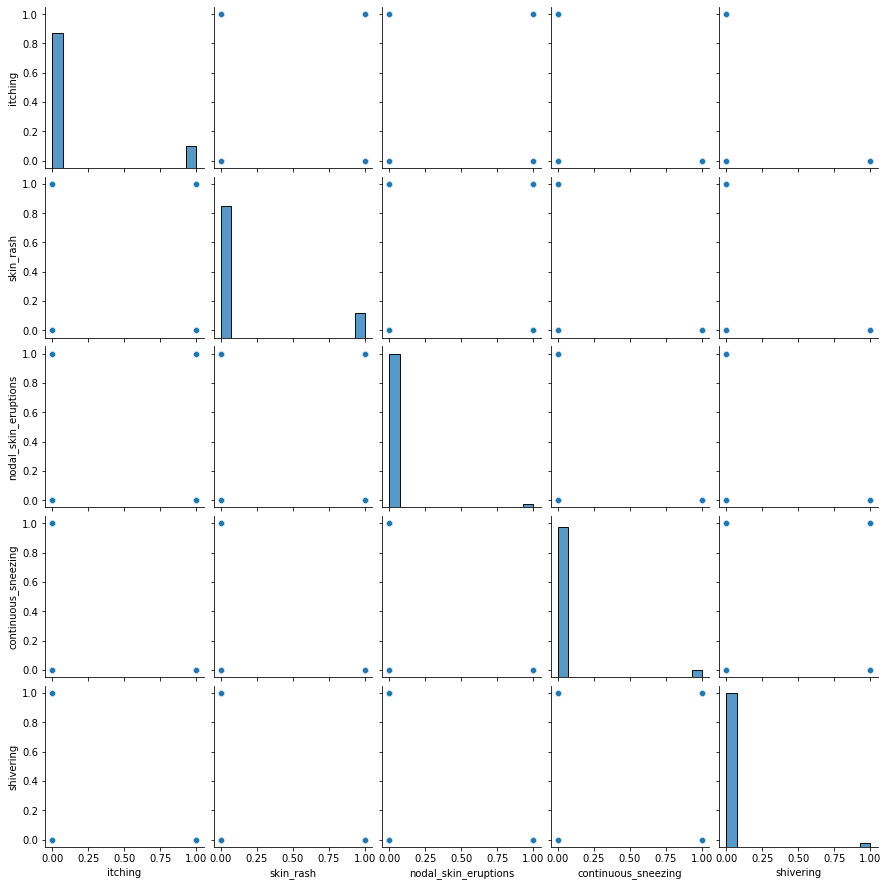

In [10]:
# visualize pairplot
import seaborn as sns
plo = disease.columns[0:5].tolist()
sns.pairplot(disease[plo])

In [11]:
# column names
print(disease.columns.to_list())

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [12]:
# define y
y = disease["prognosis"]

In [13]:
# define X
X = disease[['itching', 'skin_rash', 'nodal_skin_eruptions', 
             'continuous_sneezing', 'shivering', 'chills', 
             'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue',
             'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination',
             'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
             'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level',
             'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration',
             'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite',
             'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
             'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload',
             'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
             'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
             'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements',
             'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness',
             'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels',
             'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties',
             'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech',
             'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
             'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness',
             'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine',
             'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)',
             'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body',
             'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes',
             'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum',
             'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion',
             'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen',
             'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf',
             'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
             'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister',
             'red_sore_around_nose', 'yellow_crust_ooze',]]

In [14]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [15]:
# verify shape
a = np.array([X_train.shape, X_test.shape, y_train.shape, y_test.shape], dtype = 'object')
a

array([(3936, 132), (984, 132), (3936,), (984,)], dtype=object)

In [16]:
# select model
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

In [17]:
# train model
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# predict with model
y_pred = model.predict(X_test)
y_pred

array(['Psoriasis', 'Allergy', 'Osteoarthristis', 'Fungal infection',
       'Chronic cholestasis', 'Urinary tract infection',
       'Hyperthyroidism', 'Hypoglycemia', 'Hepatitis C',
       'Peptic ulcer diseae', 'Urinary tract infection', 'Hypoglycemia',
       'Cervical spondylosis', 'Dengue', 'Hypothyroidism', 'Impetigo',
       'Acne', 'Tuberculosis', 'Alcoholic hepatitis', 'Fungal infection',
       'Diabetes ', 'hepatitis A', 'Hypothyroidism', 'Hepatitis D',
       'Gastroenteritis', '(vertigo) Paroymsal  Positional Vertigo',
       'Bronchial Asthma', 'Dengue', 'Diabetes ',
       'Urinary tract infection', 'Hepatitis B', 'Drug Reaction',
       'Varicose veins', '(vertigo) Paroymsal  Positional Vertigo',
       'Allergy', 'Alcoholic hepatitis', 'Peptic ulcer diseae',
       '(vertigo) Paroymsal  Positional Vertigo',
       '(vertigo) Paroymsal  Positional Vertigo', 'Heart attack',
       'Hepatitis E', 'Hepatitis B', 'Typhoid', 'AIDS',
       'Peptic ulcer diseae', 'Jaundice',

In [19]:
# model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


1.0

In [20]:
# model confusion matrix
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_pred)

array([[28,  0,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [ 0,  0, 23, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 33,  0,  0],
       [ 0,  0,  0, ...,  0, 21,  0],
       [ 0,  0,  0, ...,  0,  0, 20]])

In [21]:
# model classification report
from sklearn.metrics import classification_report  
print(classification_report(y_test, y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        28
                                   AIDS       1.00      1.00      1.00        22
                                   Acne       1.00      1.00      1.00        23
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        23
                              Arthritis       1.00      1.00      1.00        26
                       Bronchial Asthma       1.00      1.00      1.00        18
                   Cervical spondylosis       1.00      1.00      1.00        21
                            Chicken pox       1.00      1.00      1.00        28
                    Chronic cholestasis       1.00      1.00      1.00        22
                            Common Cold       1.00      1.00      1.00        28
                           

In [22]:
# future prediction
model.predict([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Osteoarthristis'], dtype=object)

In [23]:
# define X_new
X_new = [[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0]]

In [24]:
# predict for X_new
model.predict([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Osteoarthristis'], dtype=object)